<a href="https://colab.research.google.com/github/MuhammadUsmanTahir10/AWS-Deep-Racer-DL-Implementation/blob/main/Brain_Tumor_Detection_Using_MobileNet_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Comparing Brain Tumor Detection results using CNN and MobileNet_v2**

In this project MRI Brain Scans are analyzed using CNN and Transfer Learning relying on MobileNet_V2

The models are named as model_CNN and model_MobileNetV2 "Model created using Transfer Learning, starting with Keras application MobileNetV2

**Preparing Training and Testing Dataset**

The code below prepares numpy arrays to contain the training and testing images for both models. The input layer for MobileNetV2 has shape (None, 224, 224, 3), prompting us to convert the provided MRI scans to RGB (3 color channels) images of size 224x224. For the CNN model we transform the input images to grayscale pictures of size 150x150, thus creating arrays of shape (None, 150, 150)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random

train_path = '/content/drive/MyDrive/BrainTumourDetector/BrainTumourDataset/Training'
test_path = '/content/drive/MyDrive/BrainTumourDetector/BrainTumourDataset/Testing'

def y_2binary(n):
  z = np.zeros((4), dtype = int)
  z[n] = 1
  return z

# List of subdirectories of the train_path
sub_dirs  = os.listdir(train_path)

# Map names of the subdirectories to numerical values 0,1,2,... using dictionary.
output_dictionary = {}
for i in range(len(sub_dirs)):
  output_dictionary.update({sub_dirs[i]: 1})

print('The subdirectories are', sub_dirs, '.\n')


The subdirectories are ['notumor', 'meningioma', 'pituitary', 'glioma'] .



In [ ]:
# Creating empty list for training and test dataset for both Models

x_train_CNN = []
x_test_CNN = []

x_train_MobileNetV2 = []
x_test_MobileNetV2 = []

# Training / testing output data is same for both models
y_train = []
y_test = []

# Calculate the no of training samples in each sub directory, find total number of training samples.
# Convert images to size (150, 150) for CNN model, and to size (224,22,4,3) for MobilenetV2 model.
# Converting lists into arrays and store array in x_train.

for dir in sub_dirs:
    sub_dir_path_train = train_path + '/' + dir
    file_counter_train=0
    for path in os.listdir(sub_dir_path_train):
        x=os.path.join(sub_dir_path_train,path)
        if os.path.isfile(x):
            file_counter_train+=1

            image_CNN = cv2.resize(cv2.imread(x,cv2.IMREAD_GRAYSCALE),(150,150))
            image_MobileNetV2 = cv2.resize(cv2.imread(x),(224,224))

            x_train_CNN.append(image_CNN)
            x_train_MobileNetV2.append(image_MobileNetV2)
            y_train.append(y_2binary(output_dictionary[dir]))

    print('The training directory',dir,'has',file_counter_train,'samples.')
print()

# Calculate the number of testing samples in each subdirectory, find the total number of testing samples.
# Convert images to size (224,224,3), then convert them to an np.array, and store array in x_test.

for dir in sub_dirs:
    sub_dir_path_test = test_path + '/' + dir
    file_counter_test=0
    for path in os.listdir(sub_dir_path_test):
        x=os.path.join(sub_dir_path_test,path)
        if os.path.isfile(x):
            file_counter_test+=1

            image_CNN = cv2.resize(cv2.imread(x,cv2.IMREAD_GRAYSCALE),(150,150))
            image_MobileNetV2 = cv2.resize(cv2.imread(x),(224,224))

            x_test_CNN.append(image_CNN)
            x_test_MobileNetV2.append(image_MobileNetV2)
            y_test.append(y_2binary(output_dictionary[dir]))

    print('The testing directory',dir,'has',file_counter_test,'samples.')
print()


The training directory notumor has 1595 samples.
The training directory meningioma has 1339 samples.
The training directory pituitary has 1457 samples.
The training directory glioma has 1321 samples.

The testing directory notumor has 405 samples.
The testing directory meningioma has 306 samples.
The testing directory pituitary has 300 samples.
The testing directory glioma has 300 samples.



In [ ]:
# Convert the fully populated lists to numpy arrays

x_train_CNN = np.array(x_train_CNN)/255.0
x_test_CNN = np.array(x_test_CNN)/255.0
x_train_CNN = x_train_CNN[:,:,:,np.newaxis]
x_test_CNN = x_test_CNN[:,:,:,np.newaxis]

x_train_MobileNetV2 = np.array(x_train_MobileNetV2)/255.0
x_test_MobileNetv2 = np.array(x_test_MobileNetV2)/255.0

The total number of training samples is 5712 .
The total number of testing samples is 1311 .



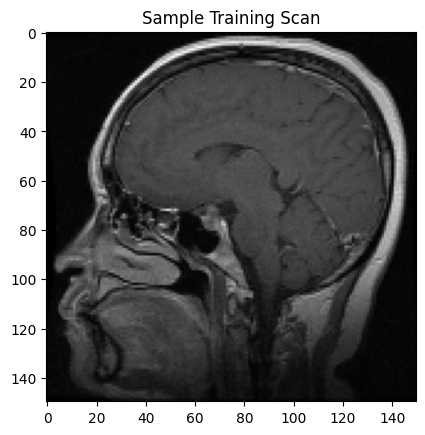

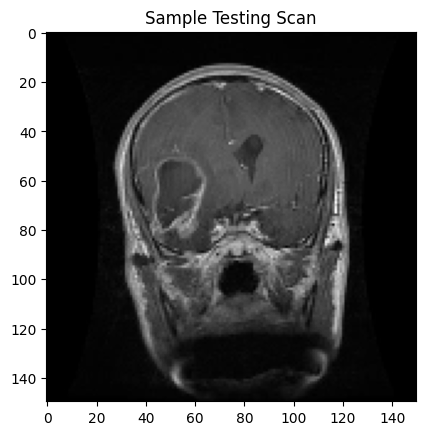

In [ ]:
# Sample training and test image

print('The total number of training samples is',len(y_train),'.')
print('The total number of testing samples is',len(y_test),'.\n')

n1 = random.randint(0,len(y_train))
plt.imshow(x_train_CNN[n1], cmap = 'gray')
plt.title('Sample Training Scan')
plt.show()

print()

n2 = random.randint(0, len(x_test_CNN))
plt.imshow(x_test_CNN[n2], cmap = 'gray')
plt.title('Sample Testing Scan')
plt.show()

**Creating CNN Model**

The next cell creates the Convolutional Neural Network model model_CNN. It is a sequential model, consisting of 4 Conv2D layers, with increasing numbers of kernels, and decreasing kernel sizes. MaxPooling and Dropout layers are inserted after each Conv2D layer. The model is completed by flattening the output of the convolutional layers, and adding a final dense layer with 4 neurons.

In [ ]:
# Creating the CNN Model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Input, Dense, InputLayer, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Model, Sequential
from keras import metrics

model_CNN = Sequential()
model_CNN.add(InputLayer(input_shape=(150,150,1)))

model_CNN.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model_CNN.add(MaxPooling2D(pool_size=(2,2)))
model_CNN.add(Dropout(0.25))

model_CNN.add(Conv2D(filters=64, kernel_size=(4,4), activation = 'relu'))
model_CNN.add(MaxPooling2D(pool_size=(2,2)))
model_CNN.add(Dropout(0.25))

model_CNN.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model_CNN.add(MaxPooling2D(pool_size=(2,2)))
model_CNN.add(Dropout(0.25))

model_CNN.add(Conv2D(filters=256, kernel_size=(2,2), activation='relu'))
model_CNN.add(MaxPooling2D(pool_size=(2,2)))
model_CNN.add(Dropout(0.25))

model_CNN.add(Flatten())
model_CNN.add(Dense(2048, activation='relu'))
model_CNN.add(Dropout(0.25))

model_CNN.add(Dense(4, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.99)
model_CNN.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model_CNN.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 70, 70, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 35, 35, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 35, 35, 64)        0

**Training the CNN model**

Train the CNN model on 50 epochs on the prepared training data

In [ ]:
import time
import math

t1 = time.time()
history_CNN = model_CNN.fit(x_train_CNN, y_train, batch_size = 64, epochs = 50)
model_CNN.save('CNN_50epochs')
t2 = time.time()
print('The training of 50 epochs of the CNN model took', round((t2-t1)/60),'minutes.')


NameError: ignored

**Crearing the MobileNet_V2 Transfer Model**

The next cell creates the trasnfer model model_MobileNetV2 by starting with MobileNet_V2. We tag on a new output layer - a dense layer with 4 neurons. Only the paramters of the last layer are trainable. A summary of the created model is displayed.

In [ ]:
# Create the Transfer Learning model from Keras application MobileNetV2.

import sys
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet_v2 import MobileNetV2

model_temp = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_temp.trainable = False
x = model_temp.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dense(4, activation='softmax')(x)

model_MobileNetV2 = Model(inputs=model_temp.input, outputs=x)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.99)
model_MobileNetV2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model_MobileNetV2.summary()


**Training the MobilNet_V2 transfer model**

Train the transfer model for 50 epochs on the prepared training data.

In [ ]:
t3=time.time()
history_MobileNetV2 = model_MobileNetV2.fit(x_train_MobileNetV2, y_train, epochs=50, batch_size=64)
model_MobileNetV2.save('MobileNetV2_50epochs')
t4=time.time()
print()
print('The training of 50 epochs of the Transfer Learning model took',round((t4-t3)/60),'minutes.')


**Accuracy and Loss on testing data**

Test the accuracy and compute the loss of both models on the provided testing data.

In [ ]:
val_loss_CNN, val_accuracy_CNN = model_CNN.evaluate(x_test_CNN, y_test)
val_loss_MobileNetV2, val_accuracy_MobileNetV2 = model_MobileNetV2.evaluate(x_test_MobileNetV2, y_test)

print()
print('The loss of the CNN model is',round(val_loss_CNN,4),' while its accuracy on testing datais ',round(100*val_accuracy_CNN,2),'%.')
print('The loss of the Transfer Learning model is',round(val_loss_MobileNetV2,4),' while its accuracy on testing datais ',round(100*val_accuracy_MobileNetV2,2),'%.')


**Accuracy and Loss plots**

Graphs of the accuracy and loss, viewed as functions of the epochs.

In [ ]:
plt.plot(history_CNN.history["loss"],c="red")
plt.plot(history_CNN.history["accuracy"],c="green")
plt.title("Loss and Accuracy in the CNN Model")
plt.ylabel("Loss/Accuracy")
plt.xlabel("Epochs")
plt.legend(['loss','accuracy'])
plt.show()

plt.plot(history_MobileNetV2.history["loss"],c="red")
plt.plot(history_MobileNetV2.history["accuracy"],c="green")
plt.title("Loss and Accuracy in the Transfer Learning Model")
plt.ylabel("Loss/Accuracy")
plt.xlabel("Epochs")
plt.legend(['loss','accuracy'])
plt.show()


**Confusion Matrices**

cells below give further graphical representation of the accurcy of both models on the testing data, by displaying their Confusion Matrices.

In [ ]:
disp_CNN = ConfusionMatrixDisplay(confusion_matrix(test, predictions_CNN))
disp_CNN.plot()
disp_CNN.ax_.set_title("Confusion matrix for the CNN model.")
plt.show()

disp_MobileNetV2 = ConfusionMatrixDisplay(confusion_matrix(test, predictions_MobileNetV2))
disp_MobileNetV2.plot()
disp_MobileNetV2.ax_.set_title("Confusion matrix for the Transfer Learning model.")
plt.show()